In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

# --------------------------------------------

output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\5. Density\2. Two_Disc\2. N_1000\3. T_0.75"

# Construir las rutas de los archivos basadas en output_dir
particle_data_file = os.path.join(output_dir, "Particle_Data.csv")
system_data_file = os.path.join(output_dir, "System_Data.csv")

Partic_DF = pd.read_csv(particle_data_file)
System_DF = pd.read_csv(system_data_file)

# --------------------------------------------

simulation_data_file = os.path.join(output_dir, "Simulation_Values.csv")

Simulation_Values = pd.read_csv(simulation_data_file)

Q = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'Q_p', 'Valor'].iloc[0])
m = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'm', 'Valor'].iloc[0])
N = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'N', 'Valor'].iloc[0])
kB = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'kB', 'Valor'].iloc[0])
Temp_Target = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'Temp_Target', 'Valor'].iloc[0])
e0 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'e0', 'Valor'].iloc[0])
R = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'R', 'Valor'].iloc[0])


r_2 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_2', 'Valor'].iloc[0])
r_1 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_1', 'Valor'].iloc[0])
r_G = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_G', 'Valor'].iloc[0])

Lim_Inf = 50000
Lim_Sup = 2000000


In [2]:
def obtener_columnas_object(dataframe):
    columnas_object = []
    tipos_datos = dataframe.dtypes
    for columna, tipo in tipos_datos.items():
        if tipo == 'object':
            columnas_object.append(columna)
    return columnas_object

# -------- Conversión de data types y alistamiento de dataframes originales --------

columns_to_convert = obtener_columnas_object(System_DF)
# print(columns_to_convert)
System_DF[columns_to_convert] = System_DF[columns_to_convert].replace(',', '.', regex=True)
System_DF[columns_to_convert] = System_DF[columns_to_convert].astype(float)
# print(System_DF.dtypes)

columns_to_convert = obtener_columnas_object(Partic_DF)
# print(columns_to_convert)
Partic_DF[columns_to_convert] = Partic_DF[columns_to_convert].replace(',', '.', regex=True)
Partic_DF[columns_to_convert] = Partic_DF[columns_to_convert].astype(float)
# print(Partic_DF.dtypes)


In [4]:
Partic_DF = Partic_DF[(Partic_DF['Step'] >= Lim_Inf) & (Partic_DF['Step'] <= Lim_Sup)]
System_DF = System_DF[(System_DF['Step'] >= Lim_Inf) & (System_DF['Step'] <= Lim_Sup)]

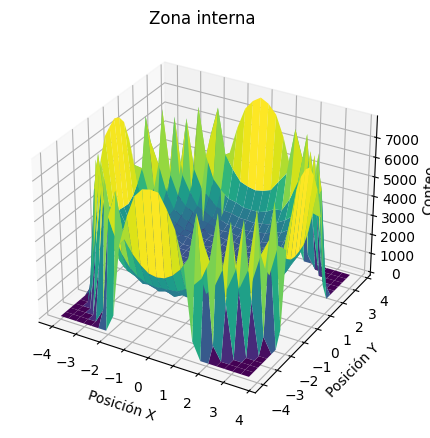

<Figure size 500x500 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Obtener las posiciones X, Y del DataFrame
x = Partic_DF["X_Pos"]
y = Partic_DF["Y_Pos"]

# Calcular las distancias desde el origen
distancias = np.sqrt(x**2 + y**2)

# Crear máscaras para seleccionar los puntos correspondientes a cada zona
mask_interna = distancias <= r_1
mask_externa = np.logical_and(distancias > r_G, distancias <= r_2)

# Obtener las coordenadas correspondientes a cada zona
x_interna = x[mask_interna]
y_interna = y[mask_interna]
x_externa = x[mask_externa]
y_externa = y[mask_externa]

# Crear una malla para la zona interna
bins_interna = 25  # Ajusta el número de bins según tus necesidades
counts_interna, x_edges_interna, y_edges_interna = np.histogram2d(x_interna, y_interna, bins=bins_interna)
X_interna, Y_interna = np.meshgrid(x_edges_interna[:-1], y_edges_interna[:-1])
Z_interna = counts_interna.T

# Crear una malla para la zona externa
bins_externa = 25  # Ajusta el número de bins según tus necesidades
counts_externa, x_edges_externa, y_edges_externa = np.histogram2d(x_externa, y_externa, bins=bins_externa)
X_externa, Y_externa = np.meshgrid(x_edges_externa[:-1], y_edges_externa[:-1])
Z_externa = counts_externa.T

# Crear la figura y los gráficos 3D
fig1 = plt.figure(figsize=(5, 5))
fig2 = plt.figure(figsize=(5, 5))

# Graficar la zona interna
ax_interna = fig1.add_subplot(111, projection='3d')
ax_interna.plot_surface(X_interna, Y_interna, Z_interna, cmap='viridis')
ax_interna.set_title('Zona interna')
ax_interna.set_xlabel('Posición X')
ax_interna.set_ylabel('Posición Y')
ax_interna.set_zlabel('Conteo')

# Guardar la figura 1
fig1.savefig(os.path.join(output_dir, "3D_Charge_Dist1.png"))

# Mostrar el gráfico 3D de la zona interna
plt.show()

# Graficar la zona externa
ax_externa = fig2.add_subplot(111, projection='3d')
ax_externa.plot_surface(X_externa, Y_externa, Z_externa, cmap='viridis')
ax_externa.set_title('Zona externa')
ax_externa.set_xlabel('Posición X')
ax_externa.set_ylabel('Posición Y')
ax_externa.set_zlabel('Conteo')

# Guardar la figura 2
fig2.savefig(os.path.join(output_dir, "3D_Charge_Dist2.png"))


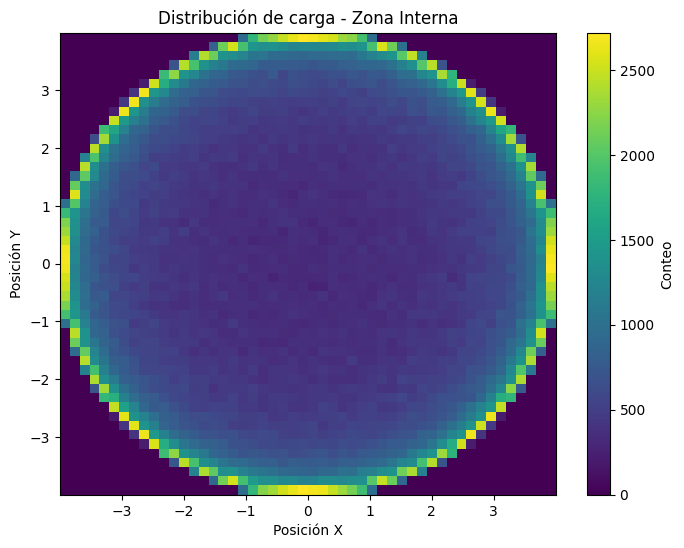

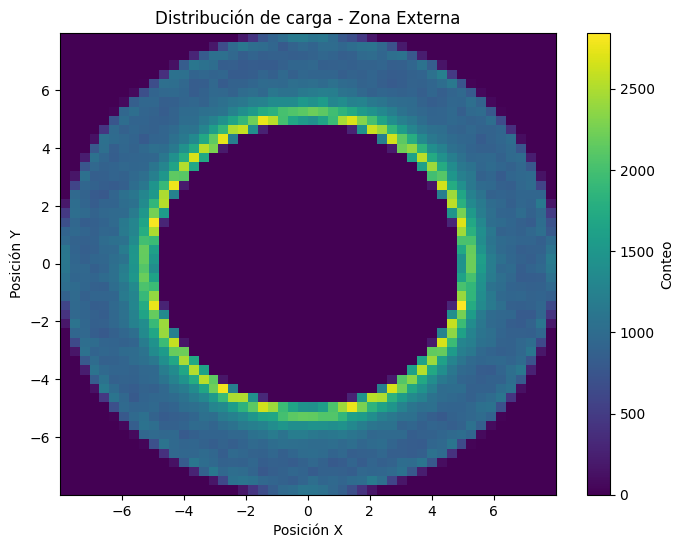

In [6]:
def graficar_zona(Partic_DF, r_1, r_2, bins, zona, name):
    # Obtener las posiciones X, Y del DataFrame
    x = Partic_DF["X_Pos"]
    y = Partic_DF["Y_Pos"]

    # Calcular las distancias desde el origen
    distancias = np.sqrt(x**2 + y**2)

    # Crear máscaras para seleccionar los puntos correspondientes a cada zona
    mask_interna = distancias <= r_1
    mask_externa = np.logical_and(distancias > r_G, distancias <= r_2)

    # Obtener las coordenadas correspondientes a la zona seleccionada
    if zona == "interna":
        x_zona = x[mask_interna]
        y_zona = y[mask_interna]
    elif zona == "externa":
        x_zona = x[mask_externa]
        y_zona = y[mask_externa]
    else:
        raise ValueError("La zona debe ser 'interna' o 'externa'.")

    # Crear el gráfico de la zona seleccionada
    plt.figure(figsize=(8, 6))
    plt.hist2d(x_zona, y_zona, bins=bins, cmap='viridis')
    plt.colorbar(label='Conteo')
    plt.title(f"Distribución de carga - Zona {zona.capitalize()}")
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')

    plt.savefig(os.path.join(output_dir, name))
    
    # Mostrar el gráfico
    plt.show()
    
graficar_zona(Partic_DF, r_1, r_2, 50, "interna", "2D_Int_Charge_Dist.png")
graficar_zona(Partic_DF, r_1, r_2, 50, "externa", "2D_Ext_Charge_Dist.png")


In [7]:
from numpy import linalg as LA

# Calcula la suma de 'Ke_Energy' para cada valor único en 'Step'
grouped_sum = Partic_DF.groupby('Step')['Ke_Energy'].sum()

# Asigna la suma correspondiente a cada fila en 'Calo_Cap'
Partic_DF['Ke_Total'] = Partic_DF['Step'].map(grouped_sum)

Partic_DF['Ke_Mean'] = Partic_DF['Vel_M']**2
Partic_DF['Ke_Mean'] = Partic_DF.groupby('Step')['Ke_Mean'].transform('mean')
Partic_DF['Ke_Mean'] = Partic_DF['Ke_Mean']*m*0.5


def magnitude(vector) : 
    return LA.norm(vector)

def q(n) : 
    if n < N/2: 
      return Q # n will start at zero
    else : 
      return -Q

def Potencial_Energy(df):
    N = len(df)  # Obtener el número de filas en el DataFrame
    rVector = df[['X_Pos', 'Y_Pos']].values  # Obtener los valores de las columnas 'x' y 'y' como una matriz numpy
    Conts = 1 / (4 * np.pi * e0)
    Sum_m = 0
    
    for m in range(0, N):
        Qm = q(m)
        Sum_n = 0
        
        for n in range(0, N):
            if m != n:
                Qn = q(n)
                Dist = magnitude(rVector[n] - rVector[m])
                Sum_n += Qn * Conts * (1 / Dist)
      
        Sum_m += Qm * Sum_n
    
    return Sum_m

def Potencial_Energy_2(df):
    N = len(df)
    rMatrix = df[['X_Pos', 'Y_Pos']].values
    
    Q = np.vectorize(q)(np.arange(N))  # Vectorized q(n) function
    Q_matrix = np.tile(Q, (N, 1))
    
    r_diff = rMatrix[:, np.newaxis, :] - rMatrix[np.newaxis, :, :]
    distances = LA.norm(r_diff, axis=-1)
    
    np.fill_diagonal(distances, 1.0)  # Avoid division by zero on the diagonal
    
    Conts = 1 / (4 * np.pi * e0)
    potential_matrix = Q_matrix * Q_matrix.T * Conts / distances
    np.fill_diagonal(potential_matrix, 0)
    
    potential_energy = np.sum(potential_matrix)
    
    return potential_energy

grouped = Partic_DF.groupby('Step')

for step, group in grouped:
    Pot_Energy = Potencial_Energy_2(group)
    Partic_DF.loc[group.index, 'Pot_Energy'] = Pot_Energy
    
    # Pot_Energy_2 = Potencial_Energy_2(group)
    # Partic_DF.loc[group.index, 'Pot_Energy_2'] = Pot_Energy_2
    
    print((step/System_DF['Step'].max())*100)


# Realizar la fusión (merge) de los DataFrames basándote en la columna 'Step'
Partic_DF = pd.merge(Partic_DF, System_DF[['Step', 'Temp_Tar']], on='Step', how='left')
Partic_DF = pd.merge(Partic_DF, System_DF[['Step', 'Temp_Act']], on='Step', how='left')

Partic_DF['Total_E'] = Partic_DF['Ke_Total'] + Partic_DF['Pot_Energy']
Partic_DF['Total_EE'] = Partic_DF['Total_E']**2




14.5985401459854
14.627737226277373
14.656934306569344
14.686131386861314
14.715328467153284
14.744525547445257
14.773722627737227
14.802919708029197
14.832116788321168
14.861313868613138
14.890510948905108
14.919708029197079
14.948905109489052
14.978102189781023
15.007299270072993
15.036496350364963
15.065693430656935
15.094890510948906
15.124087591240876
15.153284671532846
15.182481751824817
15.211678832116787
15.240875912408757
15.270072992700731
15.299270072992702
15.328467153284672
15.357664233576642
15.386861313868613
15.416058394160585
15.445255474452555
15.474452554744525
15.503649635036496
15.532846715328466
15.562043795620436
15.59124087591241
15.62043795620438
15.64963503649635
15.678832116788321
15.708029197080291
15.737226277372262
15.766423357664234
15.795620437956204
15.824817518248175
15.854014598540145
15.883211678832119
15.912408759124089
15.94160583941606
15.97080291970803
16.0
16.029197080291972
16.05839416058394
16.087591240875913
16.11678832116788
16.1459854014598

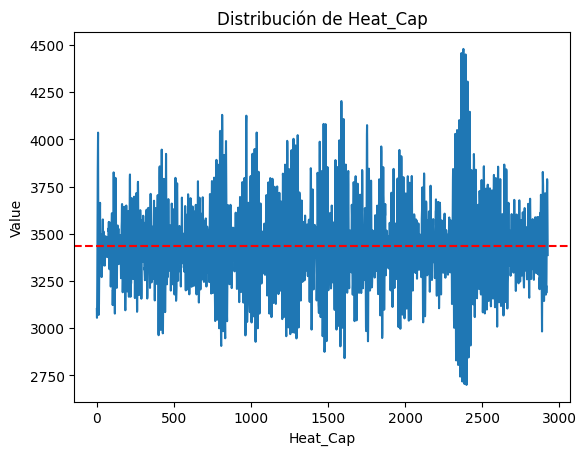

3434.1254789886148


In [8]:
Partic_DF['Heat_Cap'] =  (1/(kB*(Partic_DF['Temp_Act']**2))) * (Partic_DF['Total_EE'].mean() - ((Partic_DF['Total_E'].mean())**2))

def Plot_Dist (df,colum,line_value,name):

    # Group the DataFrame by the 'Steps' column
    grouped_df = df.groupby('Step')

    # Extract the unique values of the 'Value' column
    unique_values = grouped_df[colum].unique()
    
    plt.close("all") #this is the line to be added
    num_steps = len(unique_values)
    plt.plot(range(num_steps), unique_values)
    plt.xlabel('Heat_Cap')
    plt.ylabel('Value')
    plt.title('Distribución de Heat_Cap')
    # plt.savefig(os.path.join(output_dir, "Vy_Mean_Distribution.png"))
    plt.axhline(y=line_value, color='red', linestyle='--')
    plt.savefig(os.path.join(output_dir, name))
    plt.show()
    
Plot_Dist(Partic_DF,'Heat_Cap',Partic_DF['Heat_Cap'].mean(),"Heat_Cap_Dist.png")
print(Partic_DF['Heat_Cap'].mean())

In [9]:
Partic_DF["Pos_Ratio"] = np.sqrt((Partic_DF['X_Pos']**2) + (Partic_DF['Y_Pos']**2))

1462991
4.000643137466743


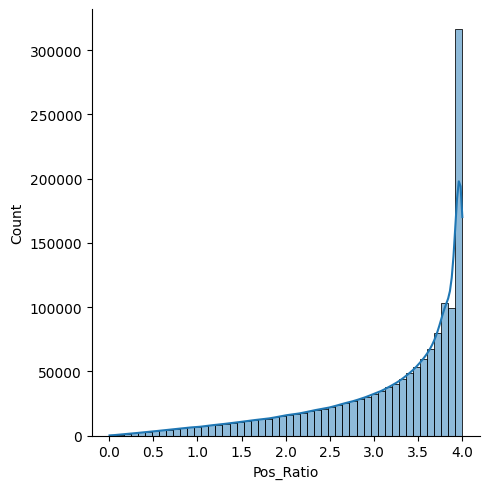

In [10]:
# ----------------------- Densidad de Carga en la Placa Interna -----------------------

Int_Density = Partic_DF[Partic_DF['Particle'] <= N/2]

Muestras = 50  # Número de muestras

# Calcular el tamaño de cada intervalo
interval_size = r_1 / Muestras

# Crear una lista de diccionarios para almacenar los resultados
resultados = []

# Calcular el rango de valores para cada intervalo y almacenarlos en la lista de resultados
for i in range(Muestras):
    inicio = i * interval_size
    fin = (i + 1) * interval_size
    resultados.append({'Intervalo': f'({inicio}, {fin})', 'Inicio': inicio, 'Fin': fin})

# Crear el DataFrame a partir de la lista de resultados
Density_Int_Info = pd.DataFrame(resultados)

# Crear una lista para almacenar los contadores de densidad de carga
densidad_carga = [0] * Muestras

# Iterar sobre cada valor en la columna Pos_Ratio de Particle_DF
for valor in Int_Density['Pos_Ratio']:
    # Verificar en qué intervalo se encuentra el valor
    for i in range(Muestras):
        inicio = i * interval_size
        fin = (i + 1) * interval_size
        if inicio <= valor < fin:
            # Incrementar el contador correspondiente al intervalo
            densidad_carga[i] += 1
            break  # Romper el bucle una vez que se ha encontrado el intervalo

# Crear una columna "Densidad_Carga" en el DataFrame df_resultados
Density_Int_Info['Count'] = densidad_carga

print(sum(Density_Int_Info['Count']))

# sns.displot(Density_Int_Info, x="Densidad_Carga",bins=Muestras, kde=True)
sns.displot(Int_Density , x="Pos_Ratio",bins=Muestras, kde=True)
print(Int_Density ["Pos_Ratio"].max())
plt.savefig(os.path.join(output_dir, "Ratial_Dist_Int.png"))



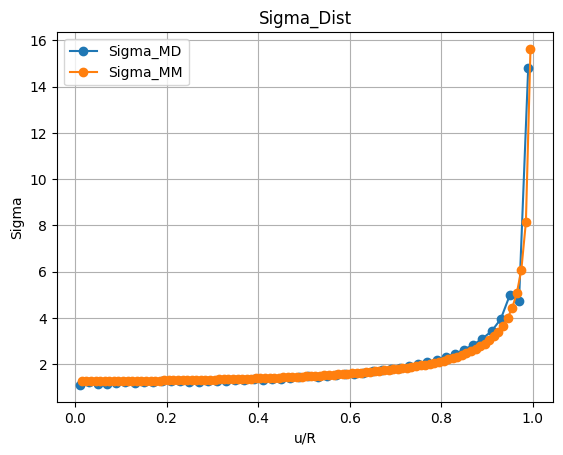

In [11]:
Robert_Data=pd.read_csv(r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\91. SigmaOneSheets.dat", sep='\t')

Density_Int_Info['u/R'] = ((Density_Int_Info['Fin']+Density_Int_Info['Inicio'])/2)/r_1
Density_Int_Info['Sigma'] = (Density_Int_Info['Count'] * Q) / (np.pi * ((Density_Int_Info['Fin']**2)-(Density_Int_Info['Inicio']**2)))

area_y1 = np.trapz(Density_Int_Info['Sigma'], Density_Int_Info['u/R'])
area_y2 = np.trapz(Robert_Data["Sigma"], Robert_Data["u/R"])

Factor_Esc = area_y2 / area_y1

Density_Int_Info['Sigma'] = Density_Int_Info['Sigma'] * Factor_Esc

plt.plot(Density_Int_Info["u/R"], Density_Int_Info["Sigma"], label="Sigma_MD", marker='o', linestyle='-')
plt.plot(Robert_Data["u/R"], Robert_Data["Sigma"], label="Sigma_MM", marker='o', linestyle='-')
plt.xlabel("u/R")  # Etiqueta del eje x
plt.ylabel("Sigma")
plt.title("Sigma_Dist")
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig(os.path.join(output_dir, "Sigma_Dist_Comp_Int.png"))

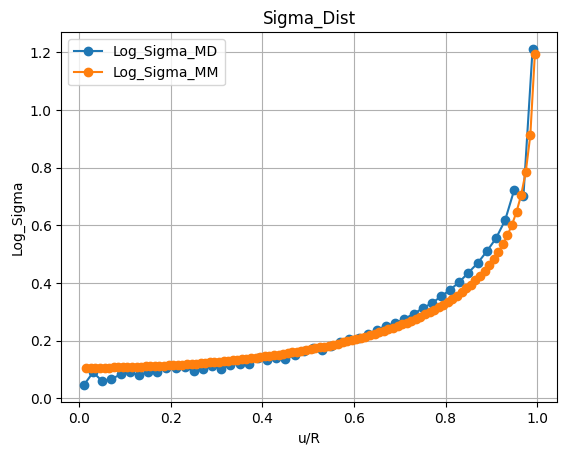

In [12]:
Density_Int_Info["Log_Sigma"] = np.log10(Density_Int_Info['Sigma'])
Robert_Data["Log_Sigma"] = np.log10(Robert_Data["Sigma"])

area_y1 = np.trapz(Density_Int_Info['Log_Sigma'], Density_Int_Info['u/R'])
area_y2 = np.trapz(Robert_Data["Log_Sigma"], Robert_Data["u/R"])

Factor_Esc = area_y2 / area_y1

Density_Int_Info['Log_Sigma'] = Density_Int_Info['Log_Sigma'] * Factor_Esc

plt.plot(Density_Int_Info["u/R"], Density_Int_Info["Log_Sigma"], label="Log_Sigma_MD", marker='o', linestyle='-')
plt.plot(Robert_Data["u/R"], Robert_Data["Log_Sigma"], label="Log_Sigma_MM", marker='o', linestyle='-')
# plt.semilogx(Density_Int_Info["u/R"], Density_Int_Info["Log_Sigma"], label='Log_Sigma_MD')
# plt.semilogx(Robert_Data["u/R"], Robert_Data["Log_Sigma"], label='Log_Sigma_MM')
plt.xlabel("u/R")  # Etiqueta del eje x
plt.ylabel("Log_Sigma")
plt.title("Sigma_Dist")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, "Log_Sigma_Dist_Comp_Int.png"))

7.999994229789932


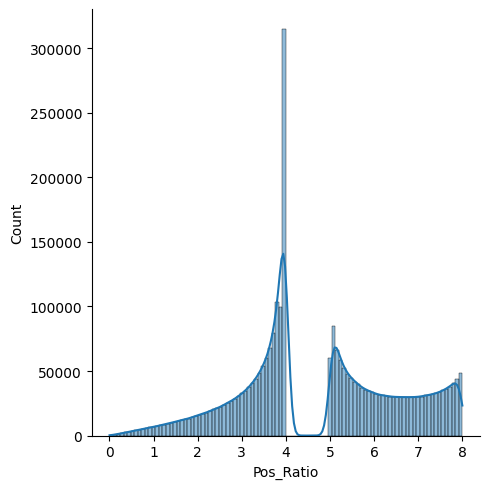

In [13]:
# ------------------ Distribución de todas las partículas ------------------

Total_Density = Partic_DF.copy()

Muestras = 100  # Número de muestras

sns.displot(Total_Density, x="Pos_Ratio",bins=Muestras, kde=True)
print(Total_Density["Pos_Ratio"].max())
plt.savefig(os.path.join(output_dir, "Ratial_Total_Dist.png"))

In [14]:
Total_Density = Partic_DF.copy()

Muestras = 20               # Número de muestras

# Calcular el tamaño de cada intervalo
interval_size_Int = r_1 / Muestras
interval_size_Ext = (r_2 - r_G) / Muestras

# Crear una lista de diccionarios para almacenar los resultados
resultados_Int = []
resultados_Ext = []

# Calcular el rango de valores para cada intervalo y almacenarlos en la lista de resultados
for i in range(Muestras):
    inicio = i * interval_size_Int
    fin = (i + 1) * interval_size_Int
    resultados_Int.append({'Intervalo': f'({inicio}, {fin})', 'Inicio': inicio, 'Fin': fin})

for i in range(Muestras):
    inicio = i * interval_size_Ext + r_G
    fin = (i + 1) * interval_size_Ext + r_G
    resultados_Ext.append({'Intervalo': f'({inicio}, {fin})', 'Inicio': inicio, 'Fin': fin})
    
    
# Crear el DataFrame a partir de la lista de resultados
Total_Density = pd.DataFrame(resultados_Int)

# Crear un DataFrame para los resultados externos
resultados_Ext_df = pd.DataFrame(resultados_Ext)

# Concatenar los DataFrames usando la función concat
Total_Density = pd.concat([Total_Density, resultados_Ext_df], ignore_index=True)

# Crear una lista para almacenar los contadores de densidad de carga
densidad_carga = [0] * (Muestras*2)  # Agregar uno para el resultado externo

# Iterar sobre cada valor en la columna Pos_Ratio de Particle_DF
for valor in Partic_DF['Pos_Ratio']:
    # Verificar en qué intervalo se encuentra el valor
    for i in range(Muestras):
        inicio_Int = i * interval_size_Int
        fin_Int = (i + 1) * interval_size_Int
        inicio_Ext = (i * interval_size_Ext) + r_G
        fin_Ext = ((i + 1) * interval_size_Ext) + r_G
        
        if inicio_Int <= valor < fin_Int:
            # Incrementar el contador correspondiente al intervalo
            densidad_carga[i] += 1
            break  # Romper el bucle una vez que se ha encontrado el intervalo
        elif inicio_Ext <= valor < fin_Ext:
            # Incrementar el contador correspondiente al intervalo
            densidad_carga[i+(Muestras)] += 1
            break  # Romper el bucle una vez que se ha encontrado el intervalo
        
# Crear una columna "Densidad_Carga" en el DataFrame df_resultados
Total_Density['Count'] = densidad_carga


# Crear la columna "Q" en el DataFrame Total_Density
Total_Density['Q'] = Q

# Aplicar la condición para ajustar los valores de la columna "Q"
Total_Density.loc[Total_Density['Fin'] > r_1, 'Q'] = -Q


# print(sum(Total_Density['Count']))

# sns.displot(Total_Density, x="Densidad_Carga",bins=Muestras, kde=True)
# sns.displot(Total_Density, x="Pos_Ratio",bins=Muestras, kde=True)
# print(Total_Density["Pos_Ratio"].max())
print("La suma de Partículas es igual a ",Total_Density["Count"].sum())
# plt.savefig(os.path.join(output_dir, "Ratial_Dist_Total.png"))

La suma de Partículas es igual a  2925990


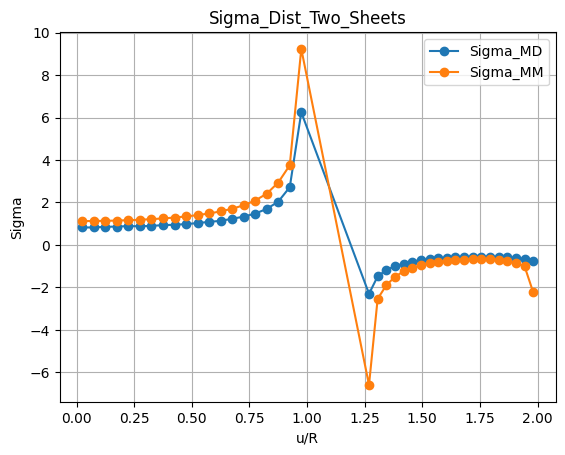

In [15]:
SigmaTwoSheets=pd.read_csv(r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\92. SigmaTwoSheets.dat", sep='\t')

Total_Density['u/R'] = ((Total_Density['Fin']+Total_Density['Inicio'])/2)/r_1

# Crear la columna "Q" en el DataFrame Total_Density
Total_Density['Q'] = Q

# Aplicar la condición para ajustar los valores de la columna "Q"
Total_Density.loc[Total_Density['Fin'] > r_1, 'Q'] = -Q

Total_Density['Sigma'] = (Total_Density['Count'] * Total_Density['Q']) / (np.pi * ((Total_Density['Fin']**2)-(Total_Density['Inicio']**2)))

area_y1 = np.trapz(Total_Density['Sigma'], Total_Density['u/R'])
area_y2 = np.trapz(SigmaTwoSheets["Sigma"], SigmaTwoSheets["u/R"])

Factor_Esc = area_y2 / area_y1

Total_Density['Sigma'] = Total_Density['Sigma'] * Factor_Esc

plt.plot(Total_Density["u/R"], Total_Density["Sigma"], label="Sigma_MD", marker='o', linestyle='-')
plt.plot(SigmaTwoSheets["u/R"], SigmaTwoSheets["Sigma"], label="Sigma_MM", marker='o', linestyle='-')
plt.xlabel("u/R")  # Etiqueta del eje x
plt.ylabel("Sigma")
plt.title("Sigma_Dist_Two_Sheets")
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig(os.path.join(output_dir, "Sigma_Dist_Comp_All.png"))

1462991
1462999


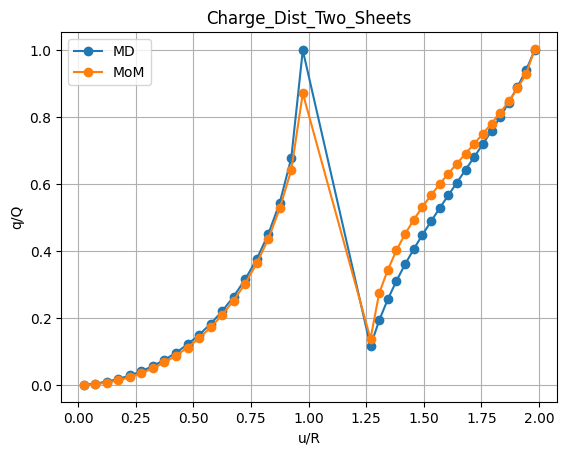

In [16]:
TwoSheets_Data = pd.read_csv(r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\93. ChargeTwoSheets.dat", sep='\t')

# Crear una lista para almacenar las sumas acumuladas
q_comulate = []
acumulado = 0
encontrado_r1 = False

# Recorrer el DataFrame Total_Density y calcular las sumas acumuladas
for index, row in Total_Density.iterrows():
    if row['Fin'] == r_1:
        acumulado += row['Count']
        q_comulate.append(acumulado)
        encontrado_r1 = True
        acumulado = 0
    elif encontrado_r1:
        acumulado += row['Count']
        q_comulate.append(acumulado)
    else:
        acumulado += row['Count']
        q_comulate.append(acumulado)
        
# Agregar la lista como columna "q_Comulate" al DataFrame Total_Density
Total_Density['q_Comulate'] = q_comulate

# Encontrar la suma de los valores de "Count" donde "Fin" es menor a r_1 y asignarla a Val1
Val1 = Total_Density.loc[Total_Density['Fin'] <= r_1, 'Count'].sum()

# Encontrar la suma de los valores de "Count" donde "Fin" es mayor a r_1 y asignarla a Val2
Val2 = Total_Density.loc[Total_Density['Fin']  > r_1, 'Count'].sum()

print(Val1)
print(Val2)

Total_Density['q/Q'] = Total_Density['q_Comulate']

for index, row in Total_Density.iterrows():
    if row['Fin'] <= r_1:
        Total_Density.loc[index, 'q/Q'] /= Val1
    elif row['Fin'] > r_1:
        Total_Density.loc[index, 'q/Q'] /= Val2

plt.plot(Total_Density["u/R"], Total_Density["q/Q"], label="MD", marker='o', linestyle='-')
plt.plot(TwoSheets_Data["u/R"], TwoSheets_Data["q/Q"], label="MoM", marker='o', linestyle='-')
plt.xlabel("u/R")  # Etiqueta del eje x
plt.ylabel("q/Q")
plt.title("Charge_Dist_Two_Sheets")
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig(os.path.join(output_dir, "Charge_Dist_Total.png"))

In [17]:
import numpy as np
from scipy.special import ellipk

# Parámetro m de la integral elíptica
m = 0.5

# Calcular la integral elíptica de primer tipo
K = ellipk(m)

# Imprimir el resultado
print("Integral elíptica de primer tipo:", K)


Integral elíptica de primer tipo: 1.8540746773013719
